In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] =df["job_skills"].apply(lambda x :ast.literal_eval(x) if pd.notna(x) else x)

# What is the optimal skill to learn for Data Analysts?

In [8]:
df_DA_US = df[(df["job_title_short"]=="Data Analyst") & (df["job_country"]=="United States")].copy()
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

In [20]:
df_DA_US_exploded = df_DA_US.explode("job_skills")
df_DA_skills = df_DA_US_exploded.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="count",ascending=False)
df_DA_US_skills = df_DA_skills.rename(columns={"count":"skills_count","median":"median_salary"})
DA_job_count = len(df_DA_US)
df_DA_US_skills["skill_percent"] = df_DA_US_skills["skills_count"]/len(df_DA_US) * 100

skill_percent = 5
df_DA_skills_high_demand = df_DA_US_skills[df_DA_US_skills["skill_percent"] > skill_percent]
df_DA_skills_high_demand


,skills_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


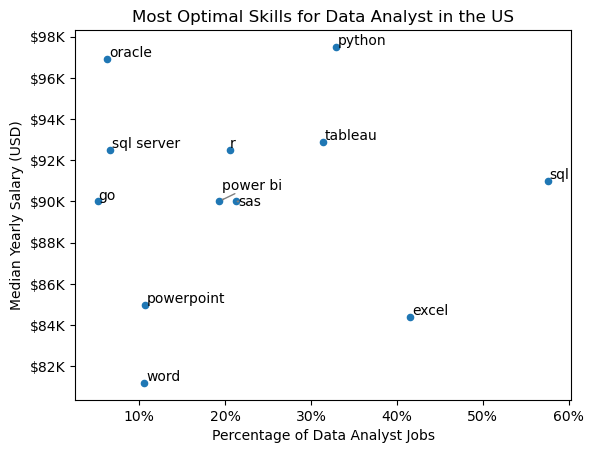

In [29]:
from adjustText import adjust_text
df_DA_skills_high_demand.plot(kind="scatter",x="skill_percent",y="median_salary")
texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_percent"].iloc[i],df_DA_skills_high_demand["median_salary"].iloc[i],txt))
adjust_text(texts,arrowprops=dict(arrowstyle="->",color="gray"))
plt.title("Most Optimal Skills for Data Analyst in the US")
plt.ylabel("Median Yearly Salary (USD)")
plt.xlabel("Percentage of Data Analyst Jobs")
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))